In [92]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFECV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [93]:
het_cyto_data = pd.read_csv('../data/het_cyto_data.tsv', sep='\t', index_col=0)
alpha_div = pd.read_csv('../data/alpha-div.tsv', sep='\t', index_col=0)
anamnesis = pd.read_csv('../data/anamnesis.csv', index_col=0)
het_cyto_data['q=1'] = alpha_div['q=1'].reindex(het_cyto_data.index)
het_cyto_data['BMI'] = anamnesis['ИМТ'].reindex(het_cyto_data.index)
het_cyto_data['glucose'] = anamnesis['ГЛ'].reindex(het_cyto_data.index)
het_cyto_data['fats_high'] = anamnesis['ЛПВП'].reindex(het_cyto_data.index)
het_cyto_data['fats_low'] = anamnesis['ЛПНП'].reindex(het_cyto_data.index)

In [94]:
het_cyto_data

,IL-6,MCP-1,IL-1b,TNF-a,IL-10,IL-8,mean_het_lvl,disease,q=1,BMI,glucose,fats_high,fats_low
5,220.947754,43.464305,2.795976,307.813620,75.573990,8.518603,0.095706,1,3.000000,27.6,4.51,2.18,2.39
6,99.129891,12.545548,1.970814,12.892022,14.675090,157.289657,0.371491,1,2.871746,43.7,5.37,1.70,2.92
7,71.148681,3.026672,2.425959,24.003158,23.084995,1.000000,0.089496,1,3.000000,38.8,5.13,1.44,3.20
11,20.000000,1.215848,3.190663,24.434444,24.109061,1.000000,0.448596,1,2.600490,34.3,4.73,0.93,2.75
13,88.591794,4.507878,1.888006,20.632980,34.908852,2.485923,0.253391,1,2.586409,29.9,9.42,0.95,2.88
15,36.828329,0.962080,1.821174,12.118703,17.131901,1.000000,0.087325,1,2.871746,36.8,5.43,1.21,3.33
27,412.888465,11.685180,5.505951,41.587768,344.189944,8.995548,0.088332,1,3.000000,43.7,4.20,1.30,2.76
31,158.174432,11.314378,4.322621,72.791282,79.709176,1.813686,0.090535,1,3.000000,34.9,4.56,1.83,2.66
40,2990.356958,91.986430,3.861303,77.112394,1225.374613,6.205014,0.083177,1,2.749459,32.5,5.18,1.26,4.08
46,331.646638,226.317705,36.819897,178.050036,154.324930,18.253838,0.083149,0,2.586409,40.7,4.35,1.34,2.98


In [95]:
X = het_cyto_data.drop('disease', axis=1)
y = het_cyto_data['disease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print(f"Before SMOTE: Class 0: {sum(y == 0)}, Class 1: {sum(y == 1)}")
print(f"After SMOTE: Class 0: {sum(y_resampled == 0)}, Class 1: {sum(y_resampled == 1)}")

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2)

param_grid_improved = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5, 0.8],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced'),
    param_grid_improved,
    n_iter=100,
    cv=10,
    scoring='roc_auc',
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best score:", random_search.best_score_)
print("Best params:", random_search.best_params_)

model = random_search.best_estimator_

Before SMOTE: Class 0: 37, Class 1: 20
After SMOTE: Class 0: 37, Class 1: 37
Best score: 0.9222222222222222
Best params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


Feature Importance:
         feature  importance
8            BMI    0.298562
10     fats_high    0.173781
3          TNF-a    0.145374
9        glucose    0.113358
0           IL-6    0.073382
11      fats_low    0.049286
4          IL-10    0.033217
6   mean_het_lvl    0.031585
1          MCP-1    0.029925
2          IL-1b    0.025607


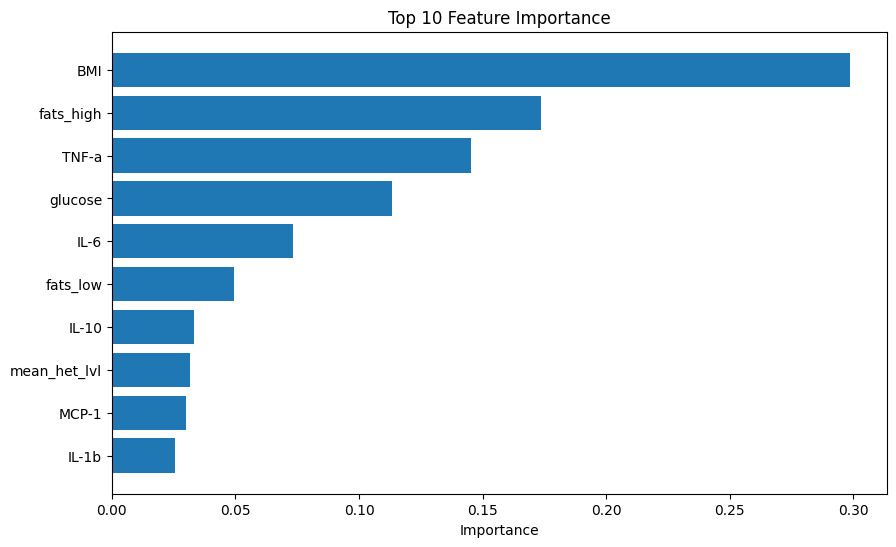

In [96]:
feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df.head(10))


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.show()